# Import Library

In [10]:
import os
from matplotlib import pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import random
import tensorflow as tf

# Configuration

In [11]:
RANDOM_SEED = 42

os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Load Data

In [12]:
base_dir = "../data/raw/animal_dataset/"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

print("Train Directory\t\t: ", train_dir)
print("Validation Directory\t: ", validation_dir)
print("Test Directory\t\t: ", test_dir, "\n")

os.system(f"tree {base_dir}")

Train Directory		:  ../data/raw/animal_dataset/train
Validation Directory	:  ../data/raw/animal_dataset/validation
Test Directory		:  ../data/raw/animal_dataset/test 

../data/raw/animal_dataset/
├── test
│   ├── data10.jpg
│   ├── data1.jpg
│   ├── data2.jpg
│   ├── data3.jpg
│   ├── data4.jpg
│   ├── data5.jpg
│   ├── data6.jpg
│   ├── data7.jpg
│   ├── data8.jpg
│   └── data9.jpg
├── train
│   ├── bird
│   │   ├── data0.jpg
│   │   ├── data1.jpg
│   │   ├── data2.jpg
│   │   └── data3.jpg
│   ├── butterfly
│   │   ├── data5.jpg
│   │   ├── data6.jpg
│   │   ├── data7.jpg
│   │   └── data8.jpg
│   ├── elephant
│ �� │   ├── data10.jpg
│   │   ├── data11.jpg
│   │   ├── data12.jpg
│   │   └── data13.jpg
│   ├── swan
│   │   ├── data15.jpg
│   │   ├── data16.jpg
│   │   ├── data17.jpg
│   │   └── data18.jpg
│   └── tiger
│       ├── data20.jpg
│       ├── data21.jpg
│       ├── data22.jpg
│       └── data23.jpg
└── validation
    ├── bird
    │   ├── data3.jpg
    │   └── data4.jpg
    

0

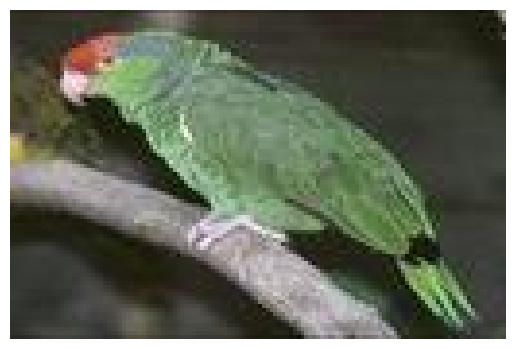

In [13]:
image_path = os.path.join(train_dir, 'bird', 'data0.jpg')

img = Image.open(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

# Image Data Generator

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(50, 100),
  batch_size=1
)

validation_generator = val_datagen.flow_from_directory(
  validation_dir,
  target_size=(50, 100),
  batch_size=1
)

Found 20 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


# Deep Learning Model

In [15]:
img_input = layers.Input(shape=(50, 100, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(50, activation='sigmoid')(x)

output = layers.Dense(5, activation='softmax')(x)

model = Model(img_input, output)
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['acc'])

# Training Model

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=10,
    verbose=2
)

Epoch 1/10
20/20 - 1s - 32ms/step - acc: 0.2000 - loss: 0.1915 - val_acc: 0.2000 - val_loss: 0.1859
Epoch 2/10
20/20 - 0s - 9ms/step - acc: 0.2000 - loss: 0.1841 - val_acc: 0.2000 - val_loss: 0.1794
Epoch 3/10
20/20 - 0s - 7ms/step - acc: 0.2000 - loss: 0.1786 - val_acc: 0.2000 - val_loss: 0.1750
Epoch 4/10
20/20 - 0s - 8ms/step - acc: 0.2000 - loss: 0.1746 - val_acc: 0.2000 - val_loss: 0.1716
Epoch 5/10
20/20 - 0s - 7ms/step - acc: 0.2000 - loss: 0.1716 - val_acc: 0.2000 - val_loss: 0.1691
Epoch 6/10
20/20 - 0s - 7ms/step - acc: 0.2000 - loss: 0.1693 - val_acc: 0.2000 - val_loss: 0.1673
Epoch 7/10
20/20 - 0s - 7ms/step - acc: 0.2000 - loss: 0.1676 - val_acc: 0.2000 - val_loss: 0.1658
Epoch 8/10
20/20 - 0s - 7ms/step - acc: 0.2000 - loss: 0.1662 - val_acc: 0.2000 - val_loss: 0.1648
Epoch 9/10
20/20 - 0s - 8ms/step - acc: 0.2000 - loss: 0.1652 - val_acc: 0.2000 - val_loss: 0.1639
Epoch 10/10
20/20 - 0s - 7ms/step - acc: 0.2000 - loss: 0.1642 - val_acc: 0.2000 - val_loss: 0.1631


# Evaluation

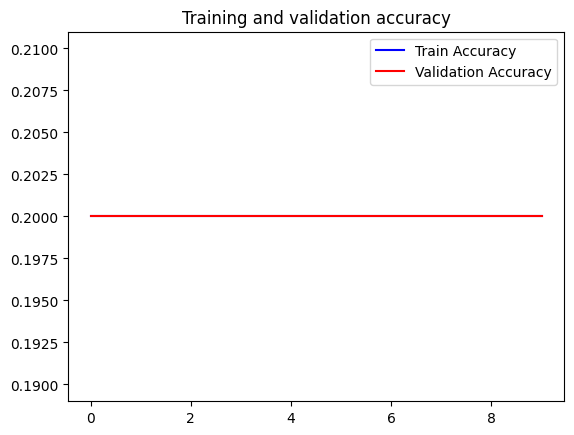

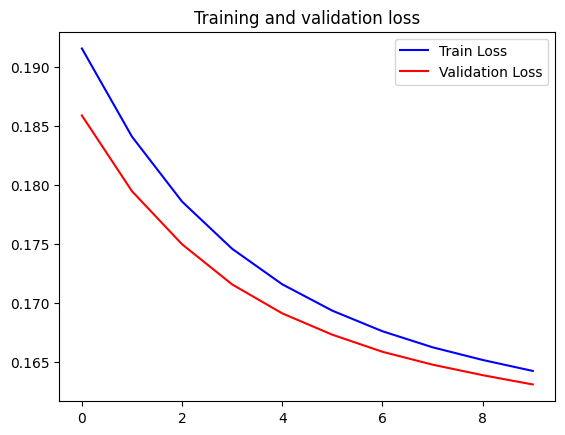

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, color='b', label='Train Accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, val_loss, color='r', label='Validation Loss')
plt.title('Training and validation loss')

plt.legend()

# Testing Image

Class Indices: {'bird': 0, 'butterfly': 1, 'elephant': 2, 'swan': 3, 'tiger': 4}
Labels (Index -> Name): {0: 'bird', 1: 'butterfly', 2: 'elephant', 3: 'swan', 4: 'tiger'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

Output Units (Softmax):
 [[0.31083667 0.12523475 0.10987132 0.2261754  0.22788182]]

Predicted animal : bird


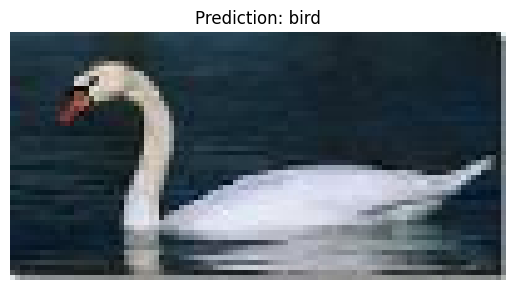

In [18]:
class_indices = train_generator.class_indices
print("Class Indices:", class_indices)

labels = {v: k for k, v in class_indices.items()}
print("Labels (Index -> Name):", labels)

img_path = os.path.join(test_dir, 'data4.jpg')
img = load_img(img_path, color_mode='rgb', target_size=(50, 100))

x = img_to_array(img)
x = x / 255.0
x = np.expand_dims(x, axis=0)

preds = model.predict(x)
print("\nOutput Units (Softmax):\n", preds)

index_preds = np.argmax(preds)

predicted_animal = labels[index_preds]
print("\nPredicted animal :", predicted_animal)

plt.imshow(img)
plt.title(f"Prediction: {predicted_animal}")
plt.axis('off')
plt.show()